<a href="https://colab.research.google.com/github/hmtayade13/tensorflow/blob/master/Classification_of_Images_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow-datasets

Requirement already up-to-date: tensorflow-datasets in /usr/local/lib/python3.6/dist-packages (3.1.0)


In [2]:
from __future__  import absolute_import, division, print_function

import tensorflow as tf
import tensorflow_datasets as tfds
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import numpy as np
import matplotlib.pyplot as plt
import math

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print("Using tensorflow version : " + tf.__version__)

Using tensorflow version : 2.2.0


In [5]:
dataset, metadata = tfds.load(name='fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteO9E9N1/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.0.incompleteO9E9N1/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.0. Subsequent calls will reuse this data.


In [0]:
class_names = ['T-shirt', 'Trouser', 'Pull-over', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
num_train_examples = metadata.splits['train'].num_examples
print("Number of test samples: {}".format(num_train_examples))

num_test_examples = metadata.splits['test'].num_examples
print("Number of test samples: {}".format(num_test_examples))

Number of test samples: 60000
Number of test samples: 10000


In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

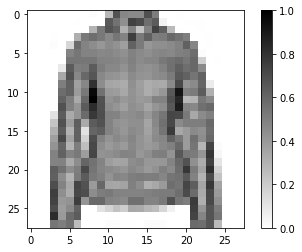

In [9]:
for image,label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))


plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

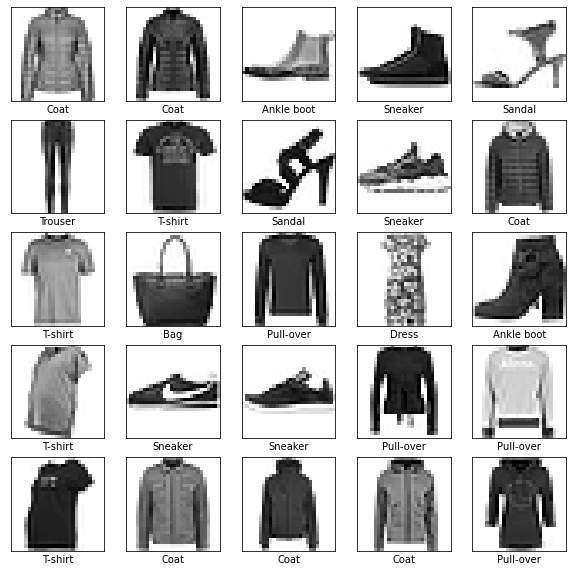

In [10]:
plt.figure(figsize=(10, 10))
i = 0;
for image, label in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i+=1
plt.show()

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=tf.nn.relu, input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = tf.nn.relu),
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax) 
])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), 
              loss=tf.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [14]:
history = model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4002 - accuracy: 0.8557
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2643 - accuracy: 0.9036
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2143 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1839 - accuracy: 0.9314
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1566 - accuracy: 0.9423
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1345 - accuracy: 0.9505
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1137 - accuracy: 0.9573
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0952 - accuracy: 0.9647
Epoch 9/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0827 - accuracy: 0.9688
Epoch 10/10
1875/1875 [==============================] - 14s 7ms/step -

Training Statistics



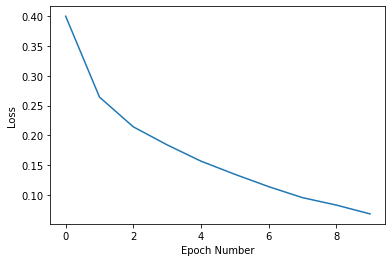

In [15]:
from matplotlib import pyplot as plt
plt.xlabel("Epoch Number")
plt.ylabel("Loss")
plt.plot(history.history["loss"])
print("Training Statistics\n")

In [16]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print("loss: "+format(test_loss) + " Accuracy: "+format(test_accuracy))

313/313 [==============================] - 3s 10ms/step - loss: 0.3025 - accuracy: 0.9177
loss: 0.3025301694869995 Accuracy: 0.9176999926567078


In [17]:
for test_images, labels in test_dataset.take(1):
  test_images = test_images.numpy()
  labels = labels.numpy()
  predictions = model.predict(test_images)

print(predictions.shape)

(32, 10)


In [18]:
print(predictions[0])

[7.2311118e-06 4.2646900e-11 2.0958218e-03 1.7030630e-09 9.9579787e-01
 2.3793165e-09 2.0990884e-03 6.5400296e-11 5.1867839e-09 1.1761841e-08]


In [19]:
np.argmax(predictions[0])

4

In [20]:
labels[0]

4

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

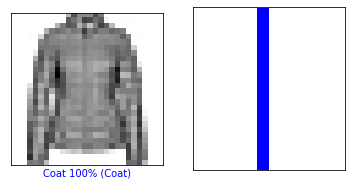

In [22]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(0, predictions, labels, test_images)
plt.subplot(1,2,2)
plot_value_array(0, predictions, labels)

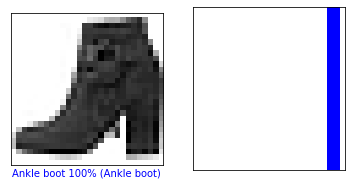

In [23]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(14, predictions, labels, test_images)
plt.subplot(1,2,2)
plot_value_array(14, predictions, labels)

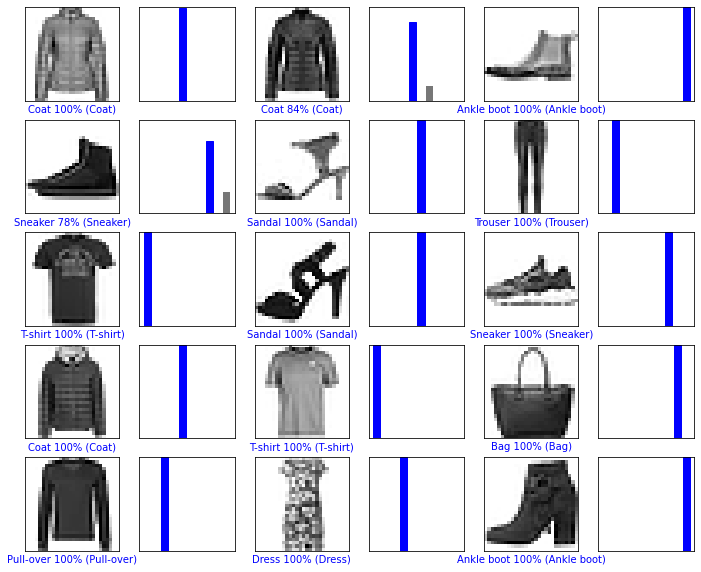

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, labels)

In [25]:
img = test_images[0]

print(img.shape)

# Add the image to a batch where it's the only member.
img = np.array([img])

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

(28, 28, 1)
(1, 28, 28, 1)
[[7.2311118e-06 4.2646900e-11 2.0958248e-03 1.7030630e-09 9.9579787e-01
  2.3793212e-09 2.0990903e-03 6.5400421e-11 5.1867839e-09 1.1761841e-08]]


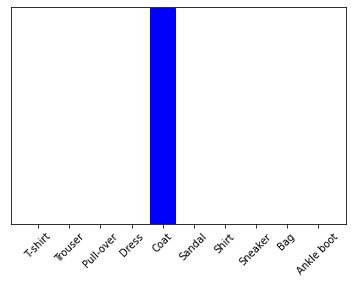

In [26]:
plot_value_array(0, predictions_single, labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [27]:
np.argmax(predictions_single)

4